In [2]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

candels = pickle.load(open('delz_candels.pkl','rb'))

In [7]:
GND12Bur = candels[-25]

delz = GND12Bur[0]
nearby = GND12Bur[1][1]
host = GND12Bur[1][2]
lc = GND12Bur[1][3]




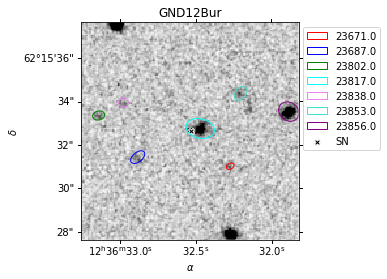

In [8]:

nick = GND12Bur[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND12Bur[1][0]['RA'],GND12Bur[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .019 )


In [10]:
from astropy.table import hstack
print(hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]]))

  id    z     z_spec z_peak  l95   u95 
----- ------ ------- ------ ----- -----
23671 1.4500 -1.0000 1.4508 0.257 2.203
23687 0.5200 -1.0000 0.5162 0.156 3.945
23802 0.6400 -1.0000 0.6367 0.408 2.402
23817 0.6500 -1.0000 0.6523 0.510 0.769
23838 0.8600 -1.0000 0.8569 0.149 2.315
23853 0.6700 -1.0000 0.6688 0.359 4.462
23856 1.9500 -1.0000 1.9495 1.687 2.152


## The host is clear in my catalog the photz ~ 0.65 ~ [0.51,0.77]

## Is published as zSN ~ 0.82 +- .13 host + SN phot; host ~ 0.69 +- 0.4 (Dahlen)

## The published agrees within errors and there isn't significant improvement on host photometry 

## don't need to update

## https://iopscience.iop.org/article/10.1088/0004-6256/148/1/13/pdf